## **PREDICTION OF HOUSE PRICE RENT IN LAGOS.**

### **PROJECT INTRODUCTION**
This regression analysis is going to be carried out by using the Lagos Nigeria House Rent Prices 2022 dataset.

(https://raw.githubusercontent.com/benjium/Lagos-Nigeria-Rent-Prices-2022-/main/lagos-rent%202.csv)

### **PROBLEM STATEMENT**

It is the aim of this project to create a web app that will predict rent prices in Lagos Nigeria using Machine Learning models such as the Linear Regreesion, the ensemble models and Boost models, the dataset will be carefully analyzed before being trained by the models.

In [4]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### DATASET OVERVIEW

In [5]:
#Load dataset
url = "https://raw.githubusercontent.com/benjium/Lagos-Nigeria-Rent-Prices-2022-/main/lagos-rent%202.csv"
df = pd.read_csv(url)

df.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,"3,500,000",1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London
3,2 Bedroom Apartment For Rent,2 BEDROOM HOUSE FOR RENT,"2,700,000",1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo
4,4 Bedroom Terrace Duplex For Rent,4 BEDROOM HOUSE FOR RENT,"4,000,000",1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron


In [6]:
#Checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53070 entries, 0 to 53069
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         53070 non-null  object
 1   More Info     53070 non-null  object
 2   Price         53070 non-null  object
 3   Serviced      53070 non-null  int64 
 4   Newly Built   53070 non-null  int64 
 5   Furnished     53070 non-null  int64 
 6   Bedrooms      53070 non-null  object
 7   Bathrooms     53070 non-null  object
 8   Toilets       53070 non-null  object
 9   City          53070 non-null  object
 10  Neighborhood  53070 non-null  object
dtypes: int64(3), object(8)
memory usage: 4.5+ MB


#### DATASET UNDERSTANDING

The dataset contains features that would be useful in training the model;



*   **Title and More Info** are two columns that provide specific name informations about each house that is available for rent, not useful in the model training.
*   **Price**  is an important column that gives the price of each price and this is our target column.

*  **Serviced**  is a column that tells if the house is serviced or not, a categorical column.
*  **Newly Built** is a column that tells if the house is new and has not been serviced or rented out before, it is a categorical column.

*   **Furnished** is a column that tells if the column is furnished or not, it is a categorical column.
*   **Bathroom, Bedroom and Toilets** are columns that tells the amount of bathroom, bedroom and bathroom each house contains, an important feature too.

*   **City and Neighborhood** are columns that gives the specific house address of the house.









In [7]:
#checking for the shape of the data
df.shape

(53070, 11)

In [8]:
#Check statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serviced,53070.0,0.209761,0.407142,0.0,0.0,0.0,0.0,1.0
Newly Built,53070.0,0.283060,0.450490,0.0,0.0,0.0,1.0,1.0
Furnished,53070.0,0.115640,0.319795,0.0,0.0,0.0,0.0,1.0


In [9]:
#checking for missing value in the data
df.isna().sum().sort_values(ascending=False)

Title           0
More Info       0
Price           0
Serviced        0
Newly Built     0
Furnished       0
Bedrooms        0
Bathrooms       0
Toilets         0
City            0
Neighborhood    0
dtype: int64

In [10]:
#checking for duplicated value in the data
df.duplicated().sum()

1883

#### DATA CLEANING

In [11]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [12]:
#Clean the 'Price' column by removing non-numeric characters and also converting the data type to numerical
df['Price'] = pd.to_numeric(
    df['Price'].str.replace(r'[^\d.]', '', regex=True),
    errors='coerce'
)

In [13]:
df['Price']

0        5000000
1        5000000
2        3500000
3        2700000
4        4000000
          ...   
53063     600000
53065     500000
53067     600000
53068     950000
53069     400000
Name: Price, Length: 51187, dtype: int64

In [14]:
# Extract numeric values from 'Bedrooms' column also converting the data type to numerical
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'].str.extract(r'(\d+)')[0], errors='coerce')

In [15]:
df['Bedrooms'].unique()

array([ 4.,  2.,  3.,  5.,  1.,  6.,  0., nan, 10.,  8.,  7.,  9.])

In [16]:
# Extract numeric values from 'Toilets' column also converting the data type to numerical

df['Toilets'] = pd.to_numeric(df['Toilets'].str.extract(r'(\d+)')[0], errors='coerce')

In [17]:
df['Toilets'].unique()

array([ 5.,  3.,  4.,  7.,  6.,  2.,  1.,  8.,  0., nan, 10.,  9.])

In [18]:
# Extract numeric values from 'Bathroom' column also converting the data type to numerical

df['Bathrooms'] = pd.to_numeric(df['Bathrooms'].str.extract(r'(\d+)')[0], errors='coerce')

In [19]:
df['Bathrooms'].unique()

array([ 4.,  3.,  5.,  6.,  2.,  1.,  7.,  0., nan, 10.,  8.,  9.])

**Observations**:
* The data contains 53070 observations with 11 attributes
* No missing values were found which ensured data completion
* All observations are not with the correct datatypes but the data has been cleaned and we might likely drop unneccessary columns later in the analysis

#### DATA VISUALISATION

In [20]:
#summary statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,51187.0,4.444216e+07,7.517594e+09,1.0,900000.0,2000000.0,4500000.0,1.700000e+12
Serviced,51187.0,2.115967e-01,4.084444e-01,0.0,0.0,0.0,0.0,1.000000e+00
Newly Built,51187.0,2.864595e-01,4.521111e-01,0.0,0.0,0.0,1.0,1.000000e+00
Furnished,51187.0,1.173931e-01,3.218912e-01,0.0,0.0,0.0,0.0,1.000000e+00
Bedrooms,50430.0,2.469026e+00,1.490663e+00,0.0,1.0,3.0,3.0,1.000000e+01
Bathrooms,49565.0,2.314758e+00,1.640241e+00,0.0,1.0,2.0,3.0,1.000000e+01
Toilets,49470.0,2.729109e+00,1.912416e+00,0.0,1.0,3.0,4.0,1.000000e+01


In [21]:
#categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns

In [22]:
cat_cols

Index(['Title', 'More Info', 'City', 'Neighborhood'], dtype='object')

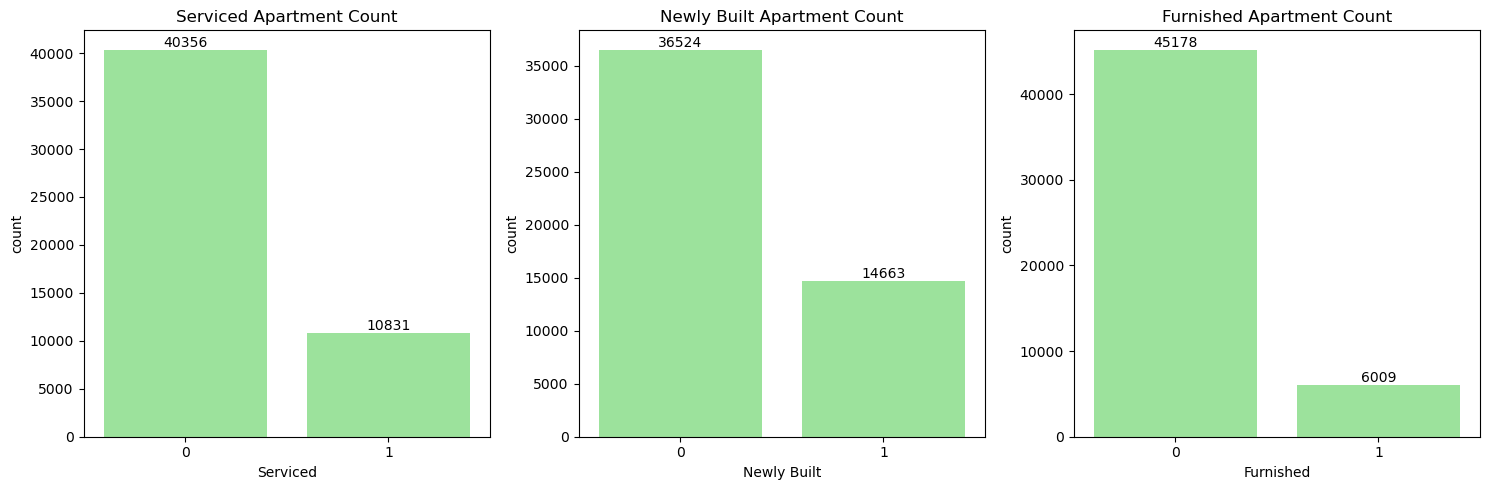

In [23]:
#Visualize the Service, Newly built and Furnished Apartment count

fs = ['Serviced','Newly Built', 'Furnished']
fig, axes = plt.subplots(1,3, figsize=(15,5))
axes = axes.flatten()

for i, col in enumerate(fs):
  plot = sns.countplot(df, x=col, ax=axes[i], color='lightgreen')
  for bar in plot.containers:
    plot.bar_label(bar)
  axes[i].set_title(f'{col} Apartment Count')

plt.tight_layout()
plt.show()

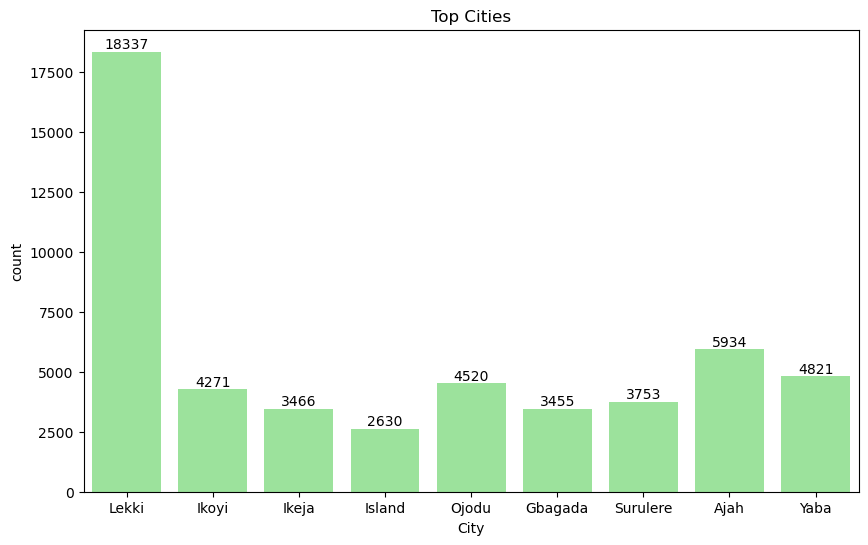

In [24]:
#Visualize Top Cities
plt.figure(figsize=(10,6))
plot = sns.countplot(df, x='City', color='lightgreen')
for bar in plot.containers:
  plot.bar_label(bar)
plt.title('Top Cities')
plt.show()

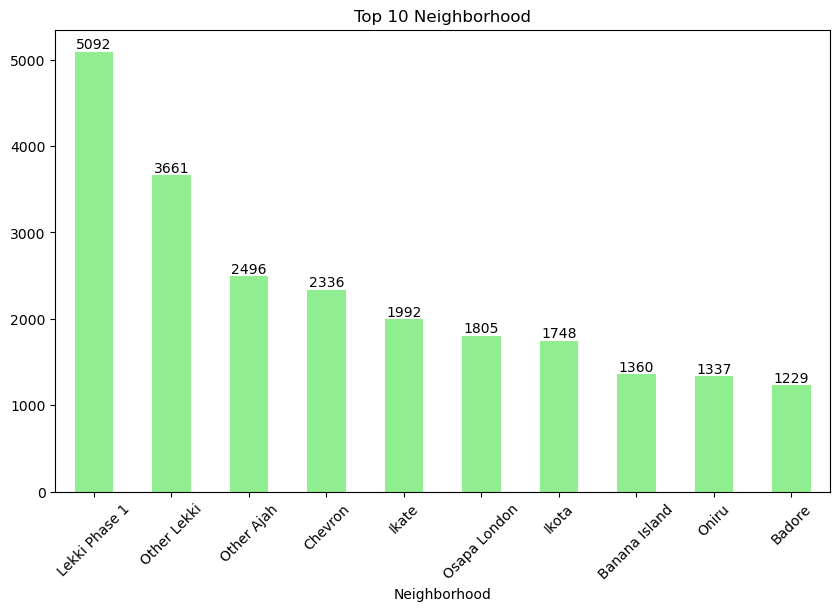

In [25]:
plt.figure(figsize=(10,6))
plot = df['Neighborhood'].value_counts().head(10).plot(kind='bar', color='lightgreen')
for bar in plot.containers:
  plot.bar_label(bar)
plt.title('Top 10 Neighborhood')
plt.xticks(rotation=45)
plt.show()

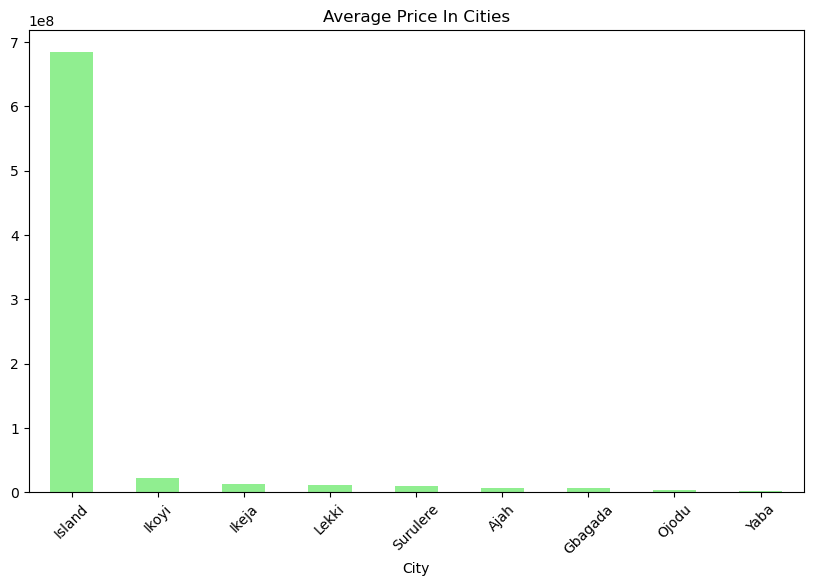

In [26]:
#Visualize the Average price in cities
plt.figure(figsize=(10,6))
df.groupby('City')['Price'].mean().sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Average Price In Cities')
plt.xticks(rotation=45)
plt.show()

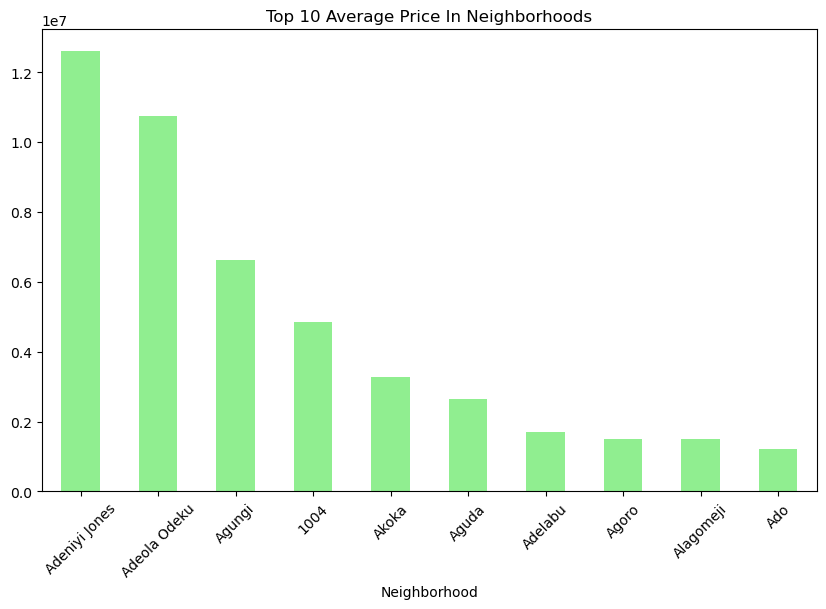

In [27]:
#Visualize the Average price in neighborhoods
plt.figure(figsize=(10,6))
df.groupby('Neighborhood')['Price'].mean().head(10).sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Average Price In Neighborhoods')
plt.xticks(rotation=45)
plt.show()

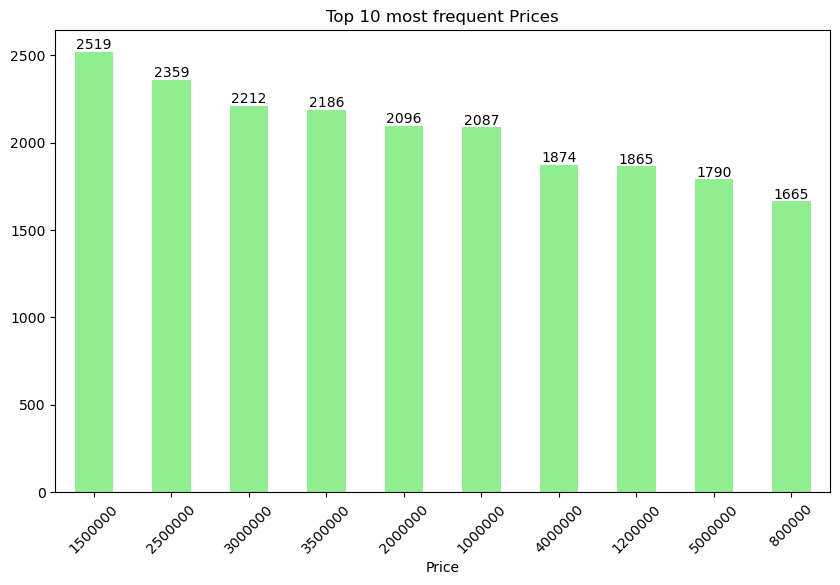

In [28]:
#Visualize the top 10 most common prices
plt.figure(figsize=(10,6))
plot = df['Price'].value_counts().head(10).plot(kind='bar', color='lightgreen')
for bar in plot.containers:
  plot.bar_label(bar)
plt.title('Top 10 most frequent Prices')
plt.xticks(rotation=45)
plt.show()

Price 
 Skew = 225.91544109241616


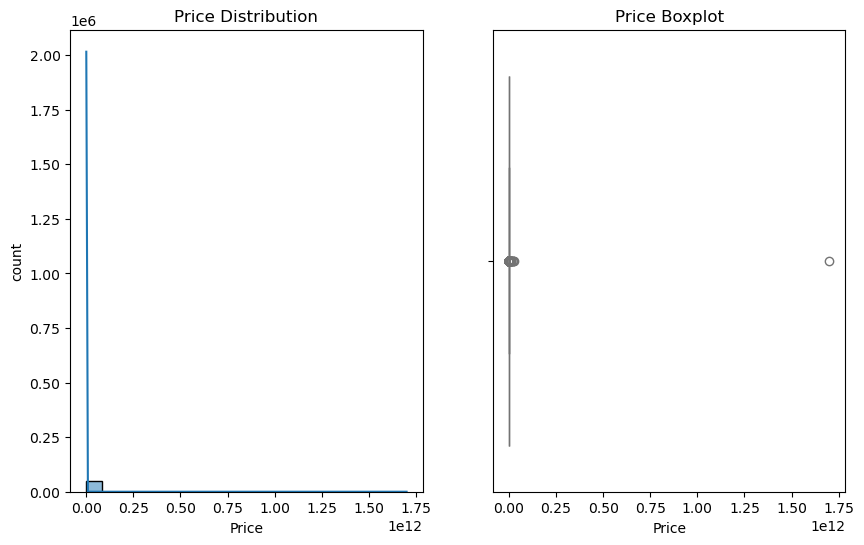

Serviced 
 Skew = 1.4122588296176888


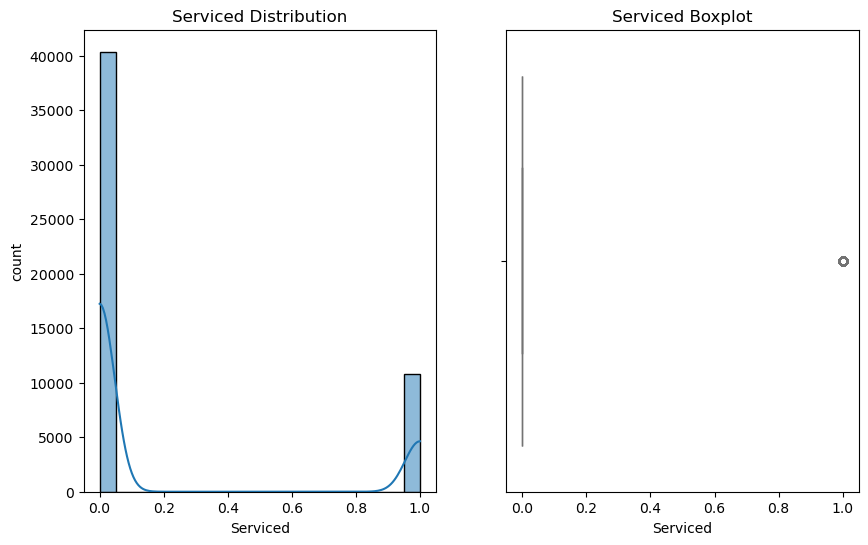

Newly Built 
 Skew = 0.9446744444840013


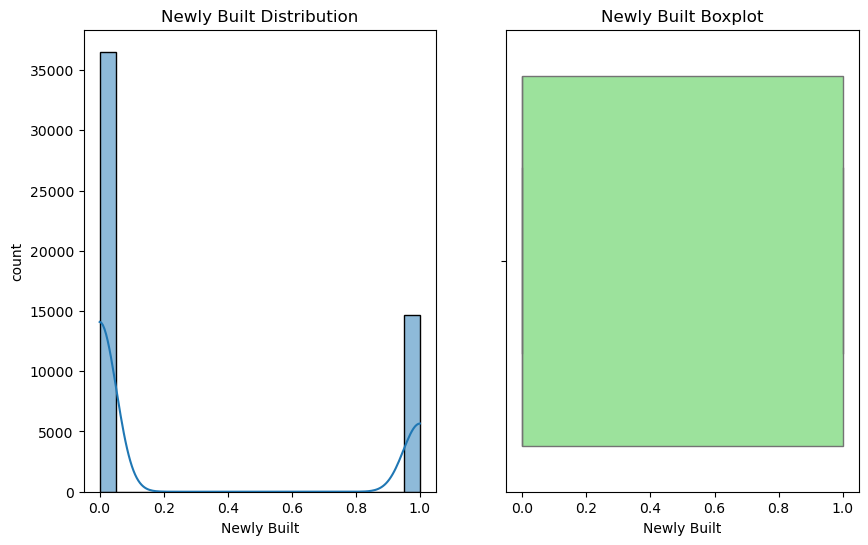

Furnished 
 Skew = 2.377336227124976


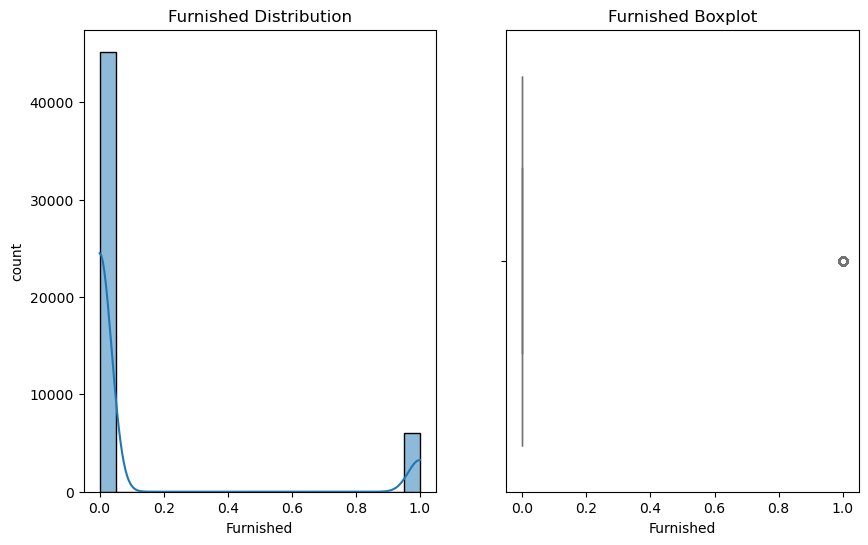

Bedrooms 
 Skew = 0.48687707815484293


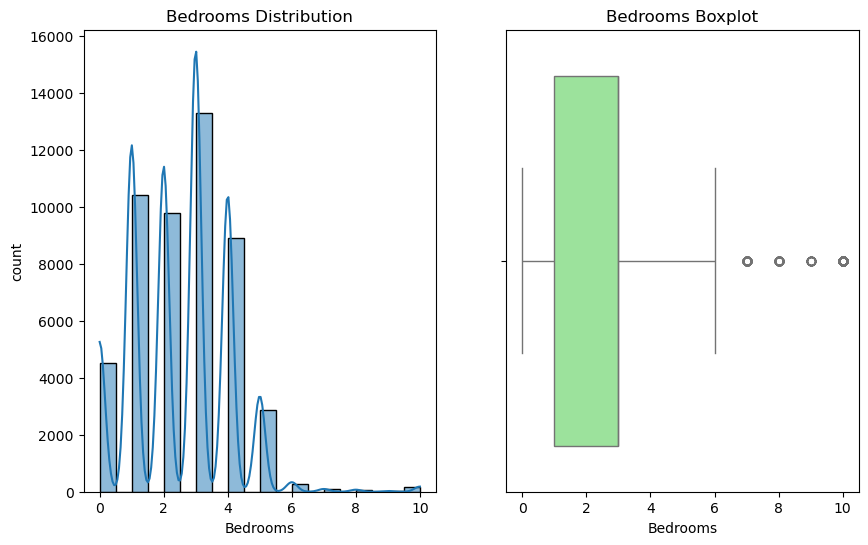

Bathrooms 
 Skew = 0.40605838277337536


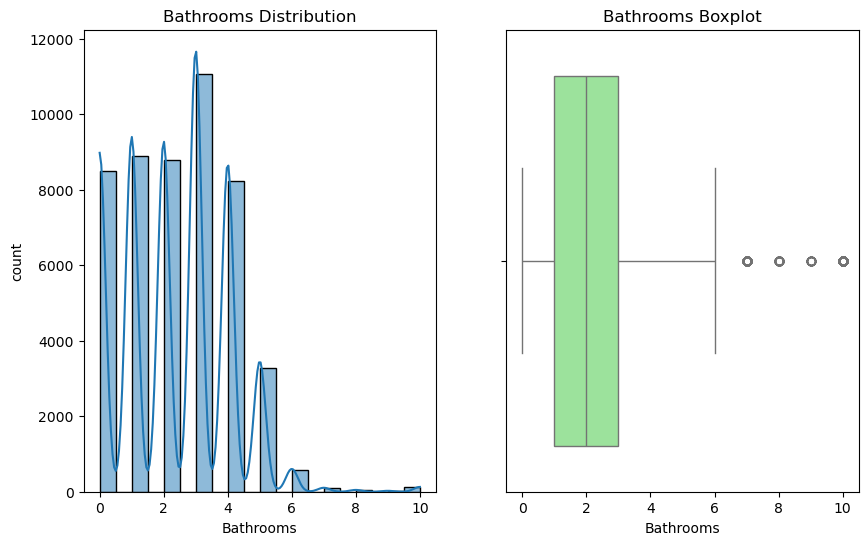

Toilets 
 Skew = 0.14741869137066163


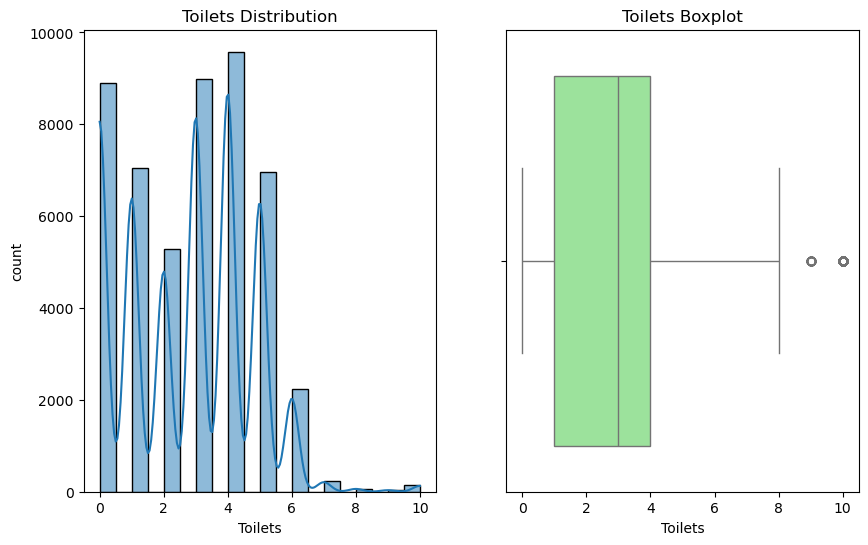

In [29]:
#Get numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# loop through numerical columns
for col in num_cols:
    skewness = df[col].skew()
    print(f'{col} \n Skew = {skewness}')
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel("count")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color= 'lightgreen')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)
    plt.show()

### FEATURE ENGINEERING

In [30]:
#handle outliers with IQR-based Capping
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers instead of removing them
df['Price'] = df['Price'].clip(lower=lower_bound, upper=upper_bound)


* To make our data more reliable for analysis and prediction, we handled the extreme prices in the dataset using a method called the Interquartile Range (IQR). This method helps us deal with outliers values that are unusually high or low compared to the rest of the data.
* Instead of completely removing those extreme values (which would reduce the size of our dataset), we capped them. Capping means we set a limit. For example, if a house is priced at ₦15 million, but the upper limit based on IQR is ₦9.5 million, we change the price from ₦15 million to ₦9.5 million. This way, we still include the house in the data, but prevent it from affecting the model too much with its unusually high value.

In [31]:
#get neighborhood names
df['Neighborhood'].unique()

array(['Agungi', 'Other Lekki', 'Osapa London', 'Ologolo', 'Chevron',
       'Lekki Phase 1', 'Ikate', 'Ikota', 'Other Ikoyi', 'Banana Island',
       'Old Ikoyi', 'Bourdillon', 'Osborne Foreshore Estate',
       'Parkview Estate', 'Dolphin Estate', 'Awolowo Road', 'Opebi',
       'Oregun', 'Adeniyi Jones', 'Other Ikeja', 'GRA', 'Allen Avenue',
       'Toyin street', 'alausa', 'Awolowo way', 'Other Victoria Island',
       'Oniru', 'Ligali Ayorinde', 'Victoria Island Extension', '1004',
       'Adeola Odeku', 'Omole Phase 1', 'Other Ojodu', 'Isheri North',
       'Ojodu Berger', 'Magodo Gra Phase 1', 'Omole Phase 2', 'Olowora',
       'Gbagada Phase 1', 'Other Gbagada', 'Medina', 'Ifako', 'Soluyi',
       'Millennium Ups', 'Oworonshoki', 'Gbagada Phase 2', 'Bode thomas',
       'Other Surulere', 'Adelabu', 'Marsha', 'Aguda', 'Ogunlana',
       'Ijesha', 'Lawanson', 'Randle Avenue', 'Ojuelegba', 'Lekki Scheme',
       'Other Ajah', 'Badore', 'Sangotedo', 'Ado', 'Onike', 'Other Yaba',
  

In [32]:
#create a function to group different neighborhoods into scores and create a new Area score column
def get_area_score(neighborhood):
    if pd.isna(neighborhood):
        return 2  # Neutral score for missing values

    area = str(neighborhood).lower() #lower all neighborhoods names to ensure uniformity

    # Define score tiers in a dictionary
    score_map = {
        5: [
            'banana island', 'bourdillon', 'victoria island extension'
        ],
        4: [
            'lekki phase 1', 'old ikoyi', 'osborne foreshore estate', 'parkview estate',
            'dolphin estate', 'victoria island', '1004', 'ikoyi', 'oniru',
            'adeola odeku', 'ligali ayorinde', 'awolowo road'
        ],
        3: [
            'chevron', 'lekki scheme', 'other lekki', 'agungi', 'osapa london', 'ologolo',
            'ajah', 'ikate', 'ikota', 'ado', 'sangotedo', 'badore',
            'allen avenue', 'opebi', 'oregun'
        ],
        2: [
            'yaba', 'other yaba', 'gbagada', 'other gbagada', 'ikeja', 'other ikeja',
            'surulere', 'other surulere', 'toyin street', 'adeniyi jones',
            'alausa', 'awolowo way', 'omole phase 1', 'omole phase 2',
            'magodo gra phase 1', 'magodo', 'ojodu berger', 'other ojodu',
            'isheri north', 'bode thomas', 'randle avenue', 'onike'
        ],
        1: [
            'oworonshoki', 'lawanson', 'ijesha', 'adelabu', 'aguda', 'ogunlana',
            'marsha', 'ojuelegba', 'ebute-metta', 'sabo', 'alagomeji', 'jibowu',
            'akoka', 'ifako', 'soluyi', 'medina', 'millennium ups'
        ]
    }

    # Match neighborhood to score
    for score, locations in score_map.items():
        for name in locations:
            if name in area:
                return score

    return 2  # Default to mid-score for unknown/unclassified areas

#Apply function to the neighborhood column to create a new Area score column
df['Area_Score'] = df['Neighborhood'].apply(get_area_score)

* The get_area_score() function is used to rate different neighborhoods in Lagos based on how expensive or desirable they are. It gives each neighborhood a score from 1 to 5, In Lagos real estate, location is one of the biggest factors influencing house prices. By assigning a score to each area, the model can learn which neighborhoods tend to be more expensive — even before looking at other details like number of bedrooms or luxury features.

In [33]:
#Count Luxury features and create a new column
df['Luxury_Count'] = df['Serviced'] + df['Furnished'] + df['Newly Built']

#Combine area + luxury into one score
df['Location_Premium'] = df['Area_Score'] + (df['Luxury_Count'] * 0.5)

* The luxury count column is representing the counting of how many luxury features each house has a value between 0 and 3.

* By multiplying Luxury_Count by 0.5, we are reducing its influence by acknowledging that amenities matter, but not as much as location, especially in Lagos real estate.

* Location_Premium column gives the model a more realistic signal about what drives price.

In [34]:
df.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood,Area_Score,Luxury_Count,Location_Premium
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,5000000,0,1,0,4.0,4.0,5.0,Lekki,Agungi,3,1,3.5
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,5000000,0,1,0,4.0,4.0,5.0,Lekki,Other Lekki,3,1,3.5
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,3500000,1,0,0,2.0,3.0,3.0,Lekki,Osapa London,3,1,3.5
3,2 Bedroom Apartment For Rent,2 BEDROOM HOUSE FOR RENT,2700000,1,1,0,2.0,3.0,3.0,Lekki,Ologolo,3,2,4.0
4,4 Bedroom Terrace Duplex For Rent,4 BEDROOM HOUSE FOR RENT,4000000,1,0,0,4.0,5.0,5.0,Lekki,Chevron,3,1,3.5


In [35]:
#Drop off unnecessary columns

df.drop(columns=['Title', 'More Info', 'Neighborhood', 'Toilets'], inplace=True)

In [36]:
df.head()

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,City,Area_Score,Luxury_Count,Location_Premium
0,5000000,0,1,0,4.0,4.0,Lekki,3,1,3.5
1,5000000,0,1,0,4.0,4.0,Lekki,3,1,3.5
2,3500000,1,0,0,2.0,3.0,Lekki,3,1,3.5
3,2700000,1,1,0,2.0,3.0,Lekki,3,2,4.0
4,4000000,1,0,0,4.0,5.0,Lekki,3,1,3.5


In [37]:
#To get new numerical columns after the feature engineering.
num_colu = df.select_dtypes(include=np.number).columns

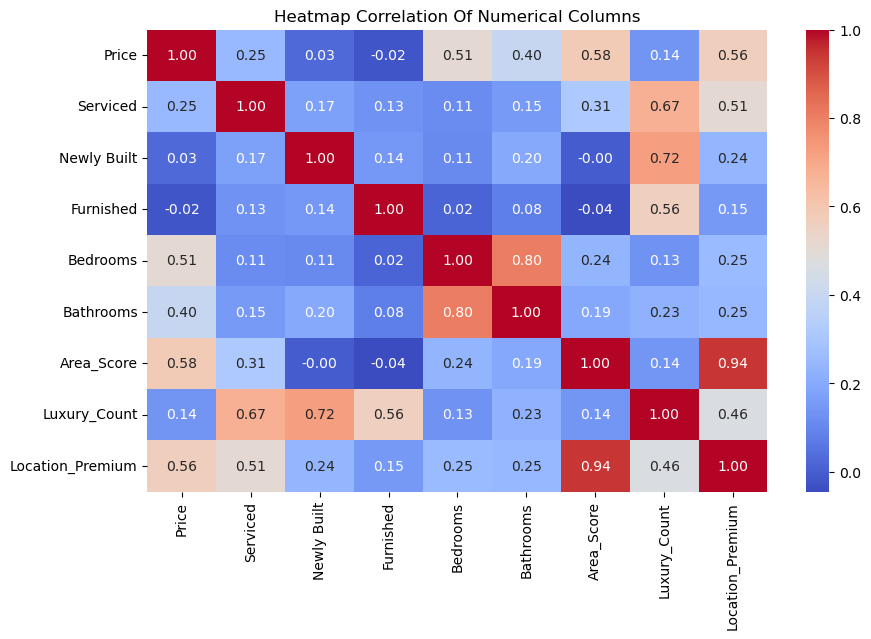

In [38]:
#Correlation

corr_matrix = df[num_colu].corr()

#visualize the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap='coolwarm')
plt.title('Heatmap Correlation Of Numerical Columns')
plt.show()

Looking at the heatmap, we can clearly see the strong, weak and correlations with the price column;
* **Serviced**, **Area_Score**, **Luxury_Count**, and the **Location_Premium** all have good positive correlations with the price column.
* **Bedrooms** and **Bathrooms** both have a strong positive correlation with the price column.
* **Newly Built** has a very weak positive corrlation with the price column.
* **Furnished** has a weak negative correlation with the price column.

* Looking at the heatmap, we can notice multicolinearity, we can deal with it by using the PCA, or better still without the PCA cos ENSEMBLE models handles multicolinearity well, but in this project we would try the two and go with the best performing one.

### DATA PREPARATION

In [39]:
#Split into feature and target variables
X = df.drop(columns=['Price'])
y = df['Price']

#Split into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
#Needed columns for preprocessing
num_coll = [ 'Serviced', 'Newly Built', 'Furnished', 'Bedrooms',
            'Bathrooms','Area_Score','Luxury_Count','Location_Premium']
cat_coll = ['City']

In [41]:
#create a preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

numerical_transformer = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='median')),
    ('Scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_coll),
    ('cat', categorical_transformer, cat_coll)
])

In [42]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('Scaler', StandardScaler())]),
                                 ['Serviced', 'Newly Built', 'Furnished',
                                  'Bedrooms', 'Bathrooms', 'Area_Score',
                                  'Luxury_Count', 'Location_Premium']),
                                ('cat',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['City'])])

### MODEL TRAINING WITHOUT PCA

In [43]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

#models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=200,random_state=42),
    'Gradient Boost': GradientBoostingRegressor(n_estimators=200, random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Lasso': Lasso(alpha=0.01, random_state=42),
    'Ridge': Ridge(alpha=1.0, random_state=42),
    'Xgboost': XGBRegressor(n_estimators=200, learning_rate = 0.1,random_state = 42)
}

#store results
results = {
    'Model' : [],
    'Test Score': [],
    'Test RMSE' : [],
    'Test MAE' : [],
     'Train Score': [],
    'Train RMSE' : [],
    'Train MAE' : []
}

#Get each model for training
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)

    #predictions for train and test
    test_pred = pipeline.predict(X_test)
    train_pred = pipeline.predict(X_train)

    #results
    test_score = r2_score(y_test, test_pred)
    train_score = r2_score(y_train, train_pred)
    test_rmse = root_mean_squared_error(y_test, test_pred)
    train_rmse = root_mean_squared_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    train_mae = mean_absolute_error(y_train, train_pred)

    #append results
    results['Model'].append(name)
    results['Train Score'].append(train_score)
    results['Test Score'].append(test_score)
    results['Train RMSE'].append(train_rmse)
    results['Test RMSE'].append(test_rmse)
    results['Train MAE'].append(train_mae)
    results['Test MAE'].append(test_mae)


In [44]:
#Convert results into dataframe
df_results = pd.DataFrame(results)

df_results

,Model,Test Score,Test RMSE,Test MAE,Train Score,Train RMSE,Train MAE
0,Linear Regression,0.620754,1.821966e+06,1.252202e+06,0.611031,1.852305e+06,1.266149e+06
1,Random Forest,0.722481,1.558570e+06,9.798969e+05,0.733776,1.532423e+06,9.568421e+05
2,Gradient Boost,0.721781,1.560534e+06,9.953286e+05,0.709852,1.599797e+06,1.016002e+06
3,AdaBoost,0.556709,1.969810e+06,1.590416e+06,0.547977,1.996803e+06,1.606717e+06
4,Lasso,0.620779,1.821906e+06,1.250910e+06,0.611049,1.852262e+06,1.265016e+06
5,Ridge,0.620781,1.821902e+06,1.250980e+06,0.611049,1.852262e+06,1.265086e+06
6,Xgboost,0.728172,1.542507e+06,9.727366e+05,0.727725,1.549740e+06,9.705593e+05


From the concluded model training, the xgboost is the best performing model at 72% with no overfitting and a good rmse score of 1.55 million.

The model will be added into a pipeline, Shap analysis would be conducted with it and finally it would be saved for model deployment.

In [45]:
#Select best model
best_model = df_results.loc[df_results['Test Score'].idxmax(), 'Model']

In [46]:
print(f'The best perfoming model is the {best_model}')

The best perfoming model is the Xgboost


In [47]:
#Create a final pipeline
best_model = models[best_model]
final_model = pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', best_model)
    ])

In [48]:
final_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['Serviced', 'Newly Built',
                                                   'Furnished', 'Bedrooms',
                                                   'Bathrooms', 'Area_Score',
                                                   'Luxury_Count',
                                                   'Location_Premium']),
                                                 ('cat',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('en...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

#### FEATURE IMPORTANCE USING SHAP

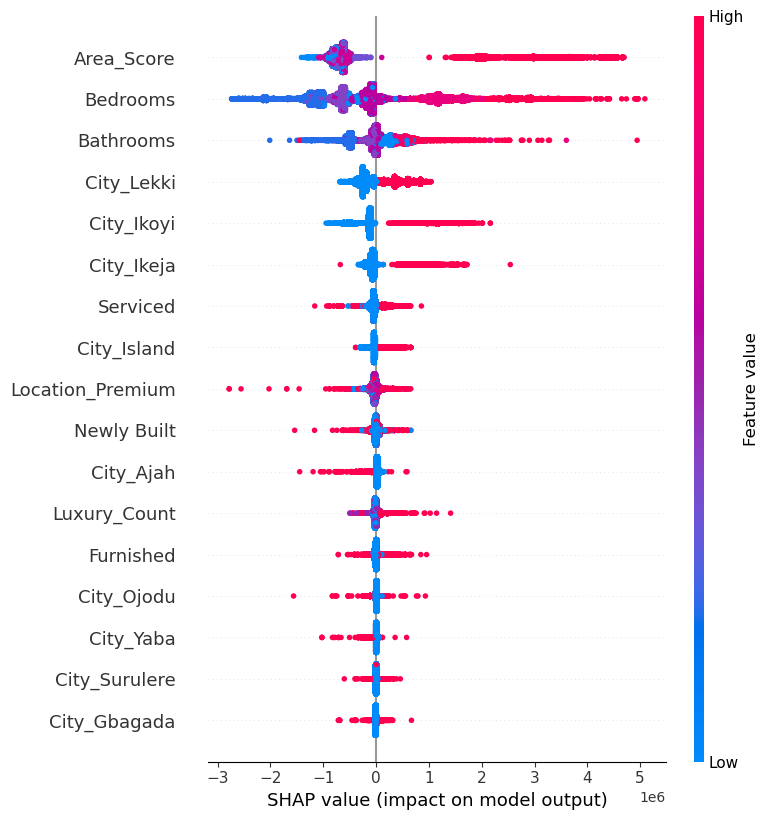

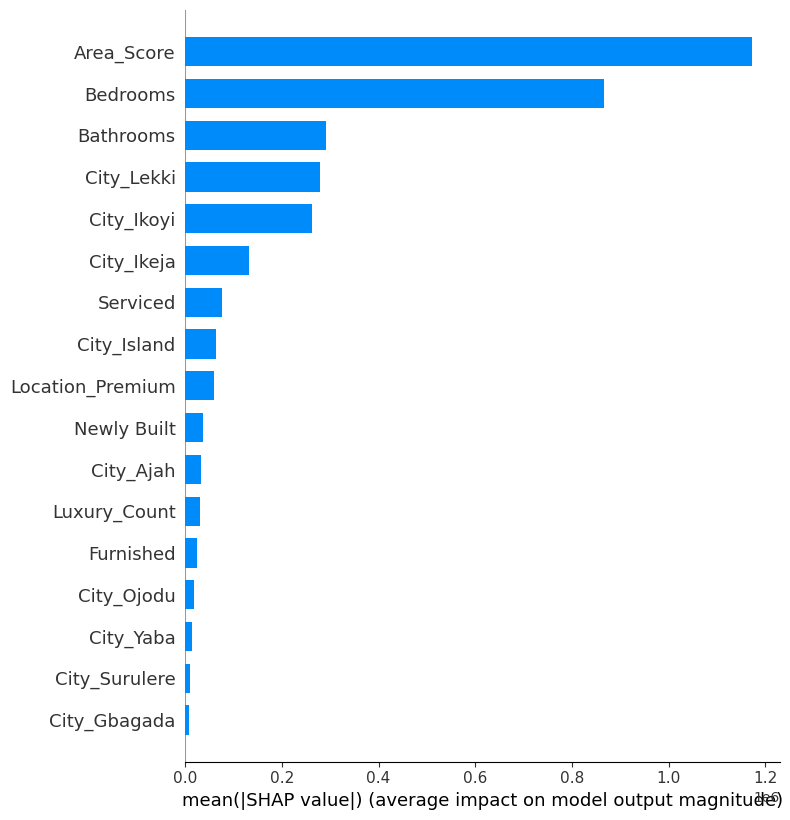

In [49]:
import shap

# Create and fit the XGBoost pipeline
final_model = pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', best_model)
    ])
final_model.fit(X_train, y_train)

# Transform data and get feature names
X_transformed = final_model.named_steps['preprocessor'].transform(X_train)
feature_names = (num_coll +
                list(final_model.named_steps['preprocessor']
                    .named_transformers_['cat']
                    .named_steps['encoder']
                    .get_feature_names_out(cat_coll)))

# SHAP analysis
explainer = shap.Explainer(final_model.named_steps['regressor'])
shap_values = explainer(X_transformed)

# Plots
shap.summary_plot(shap_values, features=X_transformed, feature_names=feature_names)
shap.summary_plot(shap_values, features=X_transformed, feature_names=feature_names, plot_type="bar")

#### **Key Insights from Your SHAP Plot:**

* **Area_Score** - The custom neighborhood scoring function is the 1 most important feature. This validates that location is crucial for Lagos rent prediction.
*  **Bedrooms** - Strong predictor, makes sense as larger properties cost more.
*   **City_Lekki**  - Being in Lekki has a strong positive impact on rental prices, which makes sense as it's one of Lagos's premium areas.

*   **City_Ikoyi**  - Similarly, Ikoyi location commands high rental premiums, consistent with it being an upscale area.

#### **Actionable Insights:**



*   **For Investors:** Location (especially Lekki/Ikoyi) and bedroom count are the primary rent drivers, Bedroom count is king, as bedrooms has the highest ROI
*   **For Tenants:** Furnished properties don't always command premium prices.

#### **For the Lagos Market:**


*  Clear geographical rent stratification exists.
*  Property features (serviced, newly built, furnished) have surprisingly low impact compared to size and location.


#### **Finally;**
The XGBoost successfully identified the real economic drivers in Lagos rentals. The huge gap between bedrooms and other features suggests this market is very size-sensitive, which aligns with typical rental market behavior.













### MODEL TRAINING WITH PCA

In [50]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import pandas as pd

# Define PCA with n components
pca = PCA(n_components=0.95)  # Retain 95% of variance

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
    'Gradient Boost': GradientBoostingRegressor(n_estimators=200, random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Lasso': Lasso(alpha=0.01, random_state=42),
    'Ridge': Ridge(alpha=1.0, random_state=42),
    'Xgboost': XGBRegressor(n_estimators=200, learning_rate=0.1)
}

# Store results
results = {
    'Model': [],
    'Test Score': [],
    'Test RMSE': [],
    'Test MAE': [],
    'Train Score': [],
    'Train RMSE': [],
    'Train MAE': []
}

# Training and evaluation
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),                  # apply PCA after preprocessing
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)

    # Predictions
    test_pred = pipeline.predict(X_test)
    train_pred = pipeline.predict(X_train)

    # Metrics
    test_score = r2_score(y_test, test_pred)
    train_score = r2_score(y_train, train_pred)
    test_rmse = root_mean_squared_error(y_test, test_pred)
    train_rmse = root_mean_squared_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    train_mae = mean_absolute_error(y_train, train_pred)

    # Store results
    results['Model'].append(name)
    results['Train Score'].append(train_score)
    results['Test Score'].append(test_score)
    results['Train RMSE'].append(train_rmse)
    results['Test RMSE'].append(test_rmse)
    results['Train MAE'].append(train_mae)
    results['Test MAE'].append(test_mae)

# Convert to DataFrame
results_df1 = pd.DataFrame(results)


In [51]:
results_df1

,Model,Test Score,Test RMSE,Test MAE,Train Score,Train RMSE,Train MAE
0,Linear Regression,0.590401,1.893473e+06,1.370798e+06,0.580425,1.923799e+06,1.378794e+06
1,Random Forest,0.721923,1.560135e+06,9.853144e+05,0.733473,1.533295e+06,9.586611e+05
2,Gradient Boost,0.714337,1.581274e+06,1.019211e+06,0.707966,1.604987e+06,1.025729e+06
3,AdaBoost,0.509487,2.072074e+06,1.706425e+06,0.508894,2.081338e+06,1.700512e+06
4,Lasso,0.590401,1.893473e+06,1.370798e+06,0.580425,1.923799e+06,1.378794e+06
5,Ridge,0.590403,1.893470e+06,1.370812e+06,0.580425,1.923799e+06,1.378810e+06
6,Xgboost,0.724795,1.552059e+06,9.830266e+05,0.729893,1.543557e+06,9.692820e+05


### The models without PCA preprocessing achieved the best performance. The ensemble methods effectively handled the original feature space, while applying PCA actually reduced models accuracy slightly.